In [5]:
from google.colab import files
import pandas as pd

# CSV Upload
uploaded = files.upload()


Saving HeightWeight.csv to HeightWeight.csv


In [6]:
df = pd.read_csv(list(uploaded.keys())[0])

# let's see the first five rows
df.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [10]:
# Check for missing values
print("Missing values in Height:", df['Height(Inches)'].isnull().sum())
print("Missing values in Weight:", df['Weight(Pounds)'].isnull().sum())


Missing values in Height: 0
Missing values in Weight: 0


In [11]:
import numpy as np

# Means
mu_x = np.mean(X)
mu_y = np.mean(Y)

# Standard deviations
sigma_x = np.std(X)
sigma_y = np.std(Y)

# Correlation
rho = np.corrcoef(X, Y)[0, 1]

print("Means:", mu_x, mu_y)
print("Standard Deviations:", sigma_x, sigma_y)
print("Correlation:", rho)


Means: 67.99311359679999 127.07942116080001
Standard Deviations: 1.9016407372498432 11.66066434332078
Correlation: 0.502858520602844


In [13]:
# Bivariate normal PDF
def bivariate_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    coeff = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    exponent = -1 / (2 * (1 - rho**2)) * (
        ((x - mu_x)**2 / sigma_x**2)
        - (2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y))
        + ((y - mu_y)**2 / sigma_y**2)
    )
    return coeff * np.exp(exponent)


In [14]:
# Create a grid around the data range
x = np.linspace(min(X)-5, max(X)+5, 100)
y = np.linspace(min(Y)-10, max(Y)+10, 100)
X_grid, Y_grid = np.meshgrid(x, y)

# Compute PDF values over the grid
Z = bivariate_pdf(X_grid, Y_grid, mu_x, mu_y, sigma_x, sigma_y, rho)


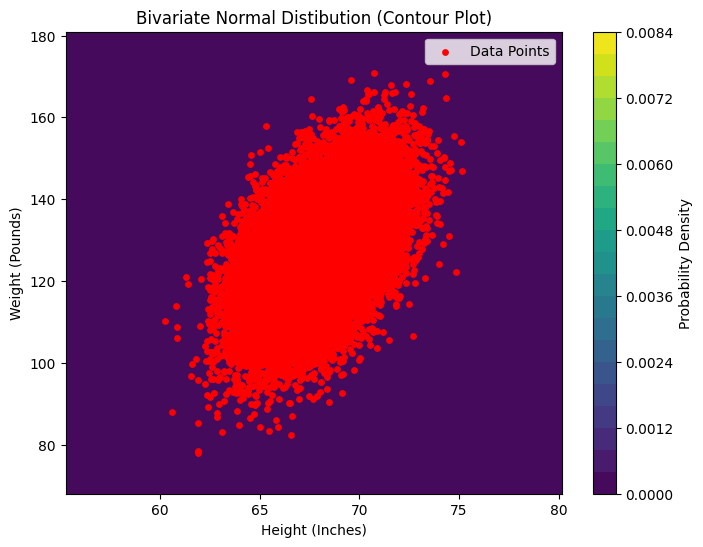

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
contours = plt.contourf(X_grid, Y_grid, Z, levels=20, cmap='viridis')
plt.scatter(X, Y, c='red', s=15, label='Data Points')
plt.title('Bivariate Normal Distibution (Contour Plot)')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.colorbar(contours, label='Probability Density')
plt.legend()
plt.show()


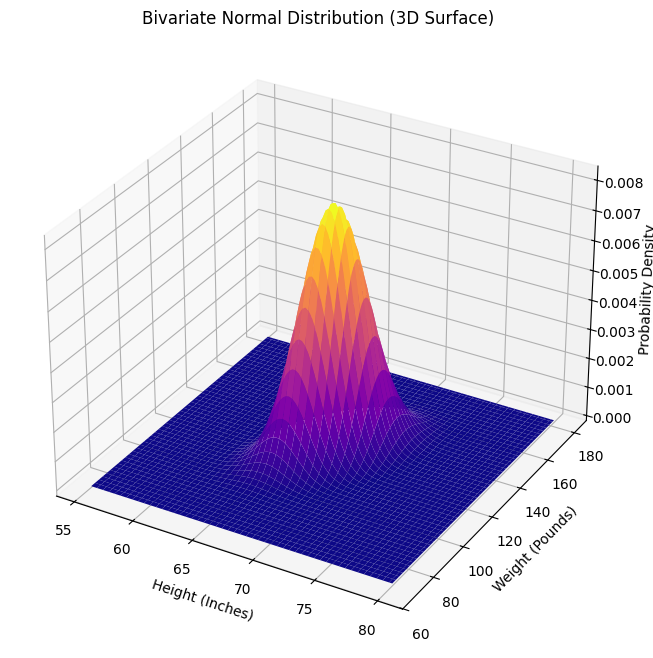

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z, cmap='plasma', edgecolor='none')
ax.set_title('Bivariate Normal Distribution (3D Surface)')
ax.set_xlabel('Height (Inches)')
ax.set_ylabel('Weight (Pounds)')
ax.set_zlabel('Probability Density')
plt.show()


In [17]:
# Compute PDF values for each actual data point
pdf_values = [bivariate_pdf(xi, yi, mu_x, mu_y, sigma_x, sigma_y, rho) for xi, yi in zip(X, Y)]

# Show the first 10 PDF values
pdf_values[:10]


[np.float64(0.0032581658909649073),
 np.float64(0.0014786212456868425),
 np.float64(0.0006340485729166238),
 np.float64(0.002902036333168338),
 np.float64(0.0017203693924557365),
 np.float64(0.0065128791878949445),
 np.float64(0.0035961426616401807),
 np.float64(0.004494280053792314),
 np.float64(0.002977185734617802),
 np.float64(0.006544913835880191)]